In [75]:
import geopandas as gpd
import numpy as np
import pandas as pd

default_crs = '32718'

In [81]:
actual_lu = gpd.read_file('/app/assets/land_uses/actual')
actual_lu.reset_index(inplace=True)
actual_lu.rename(columns={'index': 'Id'}, inplace=True)

In [82]:
# Preprocess land_uses
actual_lu['Uso'] = actual_lu['Uso'].fillna('NO INFORMADO')
mask = actual_lu['Uso'].isin(['NO INFORMADO', 'SIN INFORMACIÓN'])
actual_lu.loc[mask, 'Uso'] = 'OTROS'
actual_lu['area_predio'] = actual_lu.area

In [83]:
lu_cols = ['Id', 'Uso', 'area_predio', 'geometry']
actual_lu.dropna(subset=['geometry'], inplace=True)
actual_lu = actual_lu[lu_cols]
actual_lu.to_parquet(f'/app/assets/land_uses/actual.parquet')

In [76]:
future_lu = gpd.read_file('/app/assets/land_uses/future')
future_lu.dropna(subset=['geometry'], inplace=True)

In [77]:
mask = future_lu['Uso'].isin(['NO INFORMADO', 'SIN INFORMACIÓN'])
future_lu.loc[mask, 'Uso'] = 'OTROS'
future_lu['area_predio'] = future_lu.area

In [78]:
future_lu['Id'] = future_lu.index

In [80]:
future_lu.to_parquet('/app/assets/land_uses/future.parquet')

#### Encontrando predios en común (no sufrieron cambios entre escenarios)

In [67]:
future_mask = future_lu['geometry'].isin(actual_lu['geometry'])
future_lu[future_mask]

actual_mask = actual_lu['geometry'].isin(future_lu['geometry'])
actual_lu[actual_mask]

,Id,Uso,geometry
1,1,SITIO ERIAZO,"POLYGON ((672354.137 5923064.083, 672358.106 5..."
2,2,BIENES COMUNES,"POLYGON ((671968.972 5922686.292, 671968.972 5..."
3,3,BIENES COMUNES,"POLYGON ((671954.192 5922697.177, 671952.436 5..."
4,4,BIENES COMUNES,"POLYGON ((672046.124 5922825.816, 672076.922 5..."
5,5,SITIO ERIAZO,"POLYGON ((672663.839 5922761.680, 672681.037 5..."
...,...,...,...
2142,2142,HABITACIONAL,"POLYGON ((672533.667 5922869.933, 672563.810 5..."
2143,2143,HABITACIONAL,"POLYGON ((672537.555 5922862.196, 672566.668 5..."
2144,2144,HABITACIONAL,"POLYGON ((672550.462 5922863.205, 672555.152 5..."
2145,2145,HABITACIONAL,"POLYGON ((672555.152 5922854.667, 672550.462 5..."


In [30]:
actual_lu.shape

(2147, 6)

<Axes: >

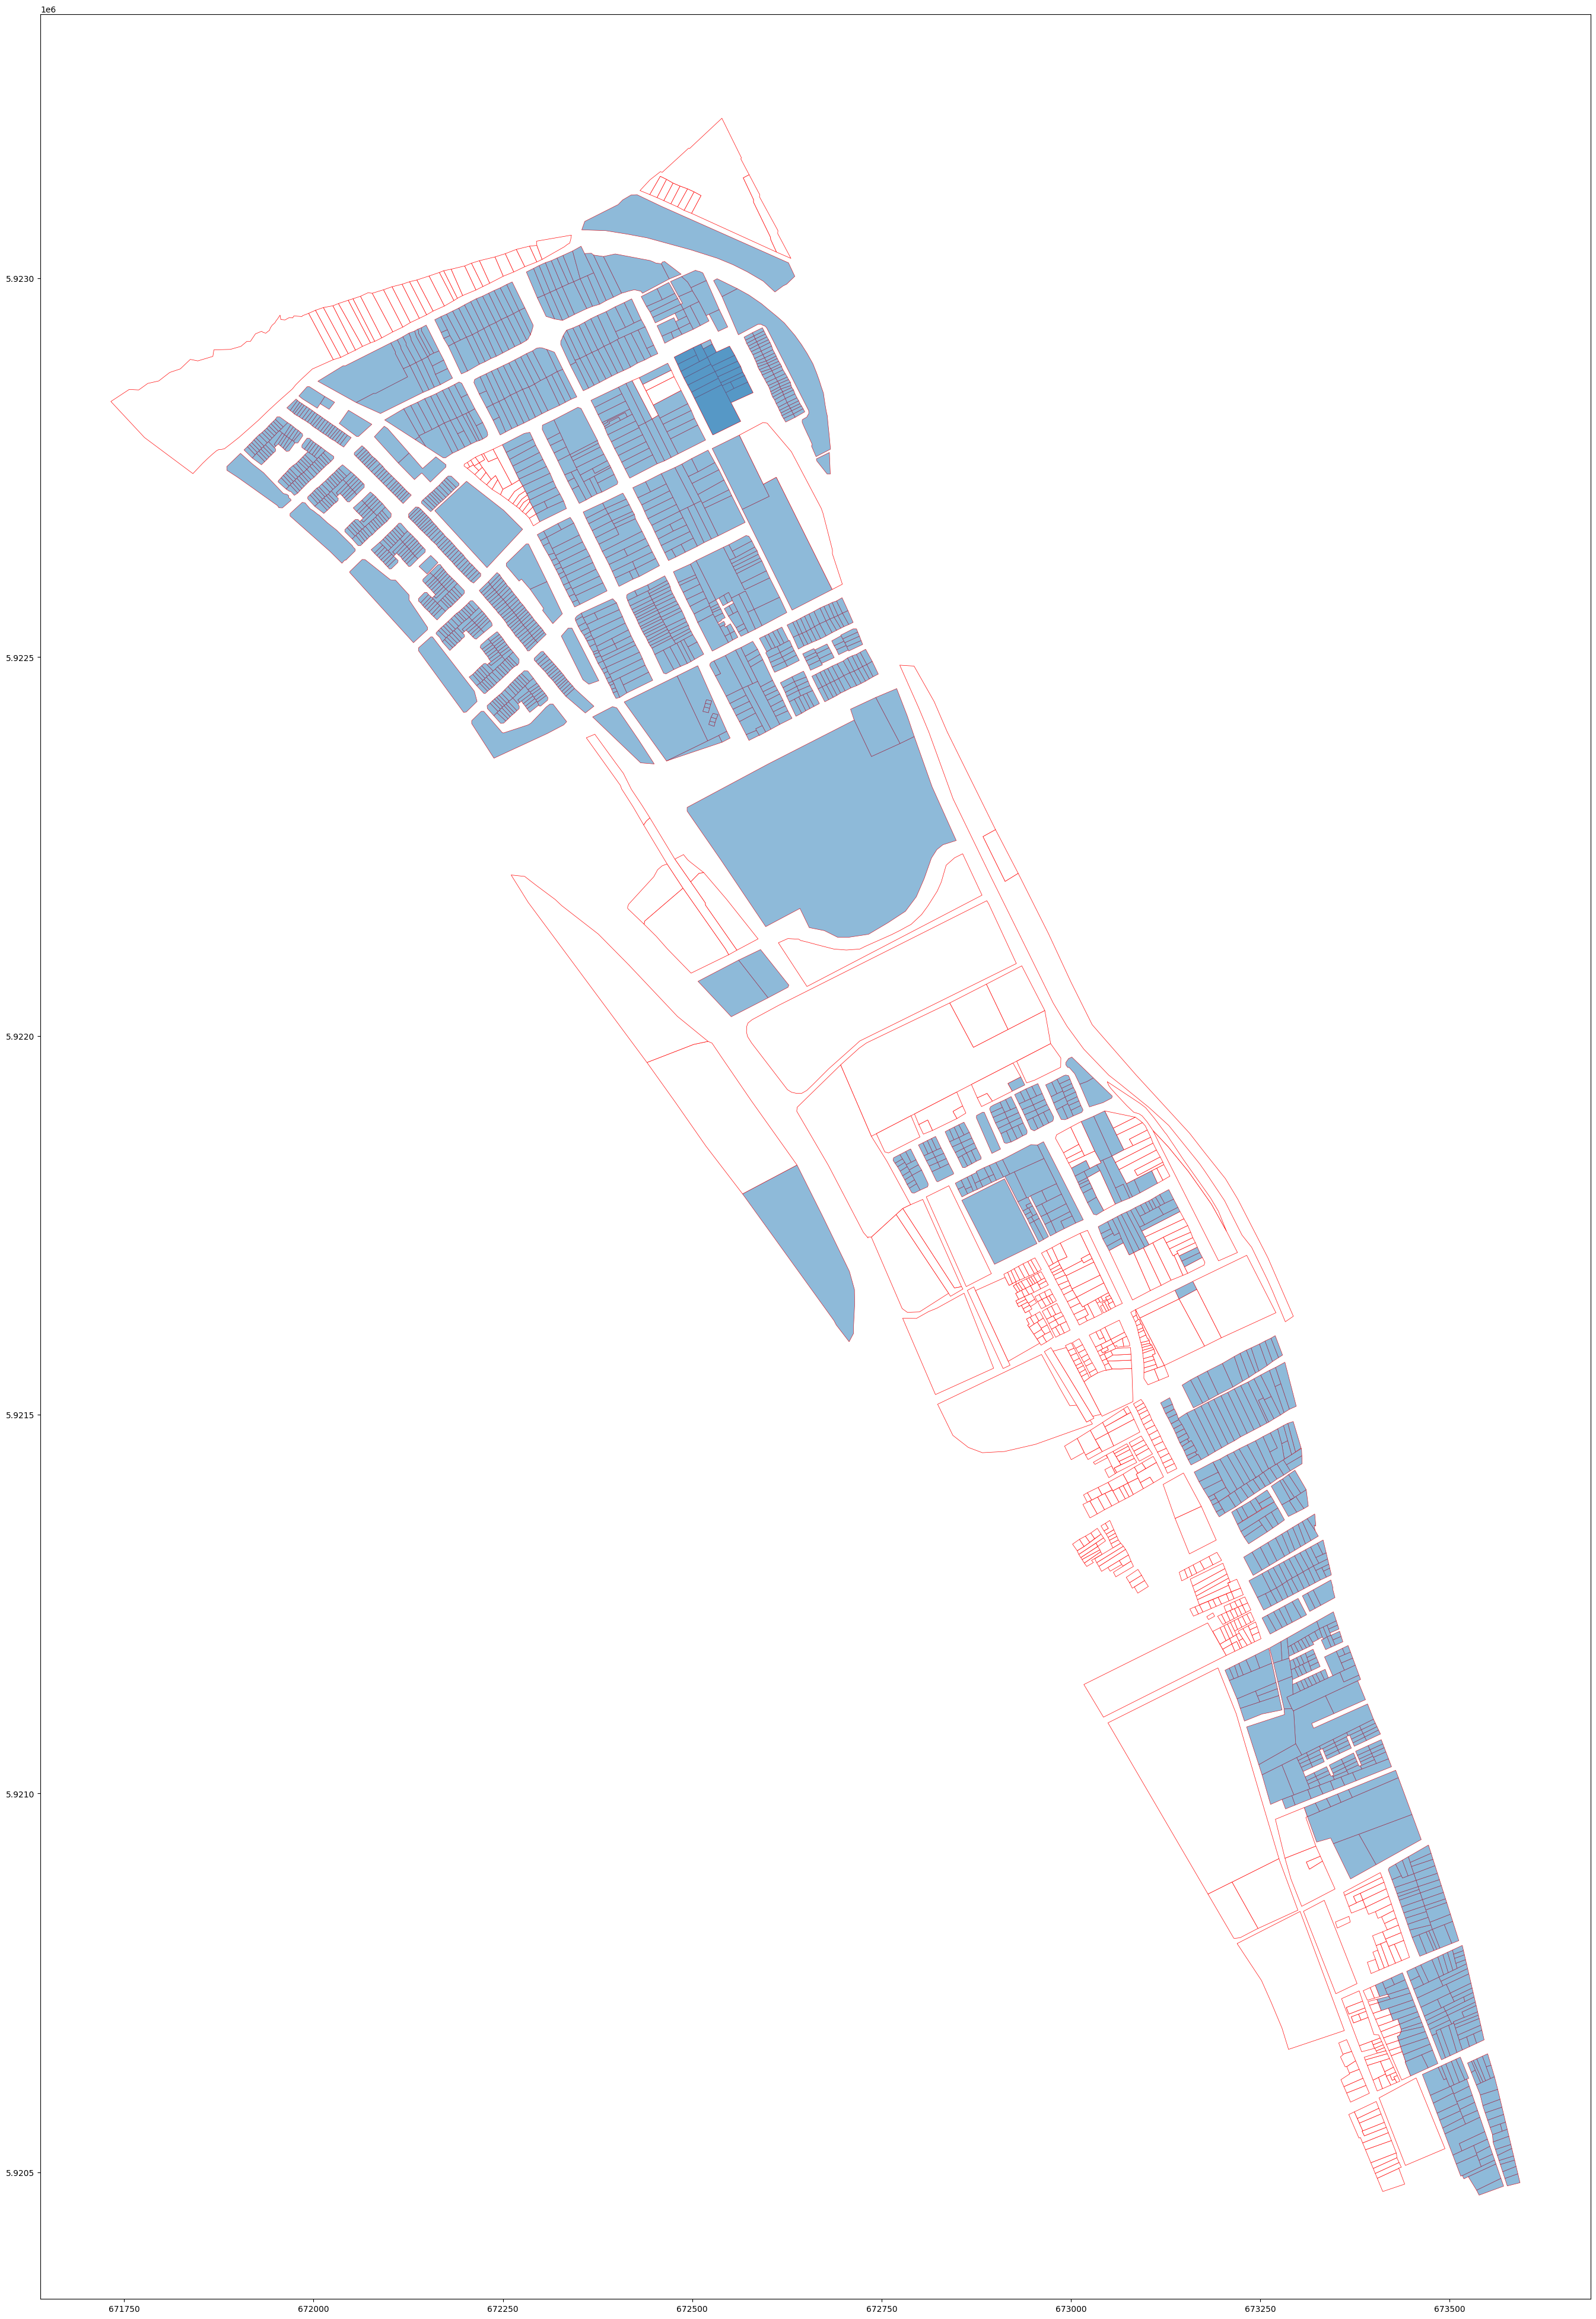

In [46]:
import matplotlib.pyplot as plt
fsize=50
fig, ax = plt.subplots(figsize=(fsize, fsize))
actual_lu.plot(ax=ax, color='white', edgecolor='red', linewidth=0.5)
future_lu[mask].plot(ax=ax, alpha=0.5)